In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
#!pip install sktime
from sktime.utils.plotting import plot_series
from statsmodels.tsa.seasonal import seasonal_decompose
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.performance_metrics.forecasting import MeanAbsolutePercentageError

In [5]:
all_dfs=pd.read_csv('complete_sales.csv')

In [79]:
def store_select (df,n):
    df=df[df['Store']==n]
    vendasregistradas=df.loc[:,['Sales']]
    vendasregistradas=vendasregistradas.reset_index()
    vendasregistradas.drop(['index'], axis=1,inplace=True)
    vendasregistradas= vendasregistradas.loc[:,'Sales']
    return vendasregistradas

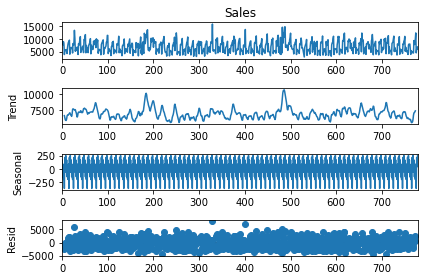

In [80]:
vendasregistradas=store_select(all_dfs,3)
#df.loc[:,['Date','Sales']==3]
res = seasonal_decompose(vendasregistradas, period=10)
res.plot();

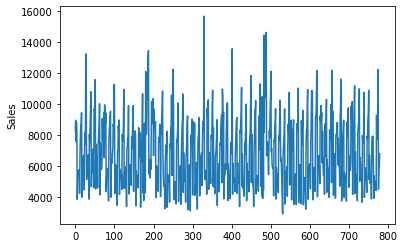

In [176]:
sns.lineplot(data=vendasregistradas);

In [116]:
y_train, y_test = temporal_train_test_split(vendasregistradas,test_size=0.2)

In [174]:
forecaster = NaiveForecaster(strategy="last",sp=12)
forecaster.fit(y_train)

fh = np.arange(1, len(y_test)+1)
y_pred = forecaster.predict(fh)

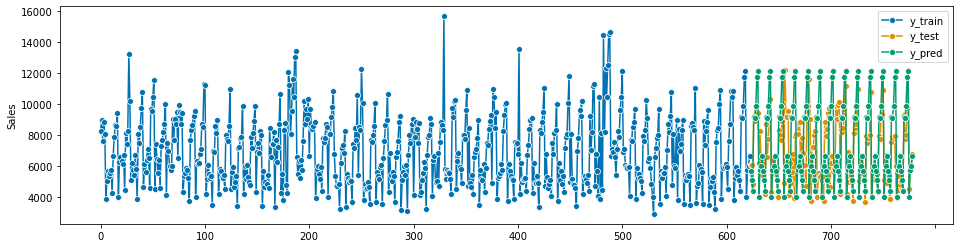

In [175]:
from sktime.utils.plotting import plot_series

fig, ax = plot_series(y_train,y_test,y_pred,labels=["y_train", "y_test", "y_pred"]) 

In [132]:
type(y_train),type(y_test),type(y_pred)

(pandas.core.series.Series,
 pandas.core.series.Series,
 pandas.core.series.Series)

In [170]:
mape=MeanAbsolutePercentageError(
    #multioutput='raw_values', symmetric=False
)
mape(y_test, y_pred)

C:\Users\rodol\anaconda3\lib\site-packages\sktime\performance_metrics\forecasting\_classes.py:422: UserWarning: y_pred and y_true do not have the same column index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(


0.2717709102206045

In [171]:
smape = MeanAbsolutePercentageError(
    #multioutput='raw_values', symmetric=True
)
smape(y_test, y_pred)

C:\Users\rodol\anaconda3\lib\site-packages\sktime\performance_metrics\forecasting\_classes.py:422: UserWarning: y_pred and y_true do not have the same column index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(


0.2717709102206045